In [1]:
from __future__ import print_function

# Import conventions we'll be using here. See Part 1
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import numpy as np

# Limits, Legends, and Layouts

In this section, we'll focus on what happens around the edges of the axes:  Ticks, ticklabels, limits, layouts, and legends.

# Limits and autoscaling

By default, Matplotlib will attempt to determine limits for you that encompasses all the data you have plotted.  This is the "autoscale" feature. For image plots, the limits are not padded while plots such as scatter plots and bar plots are given some padding.

<IPython.core.display.Javascript object>


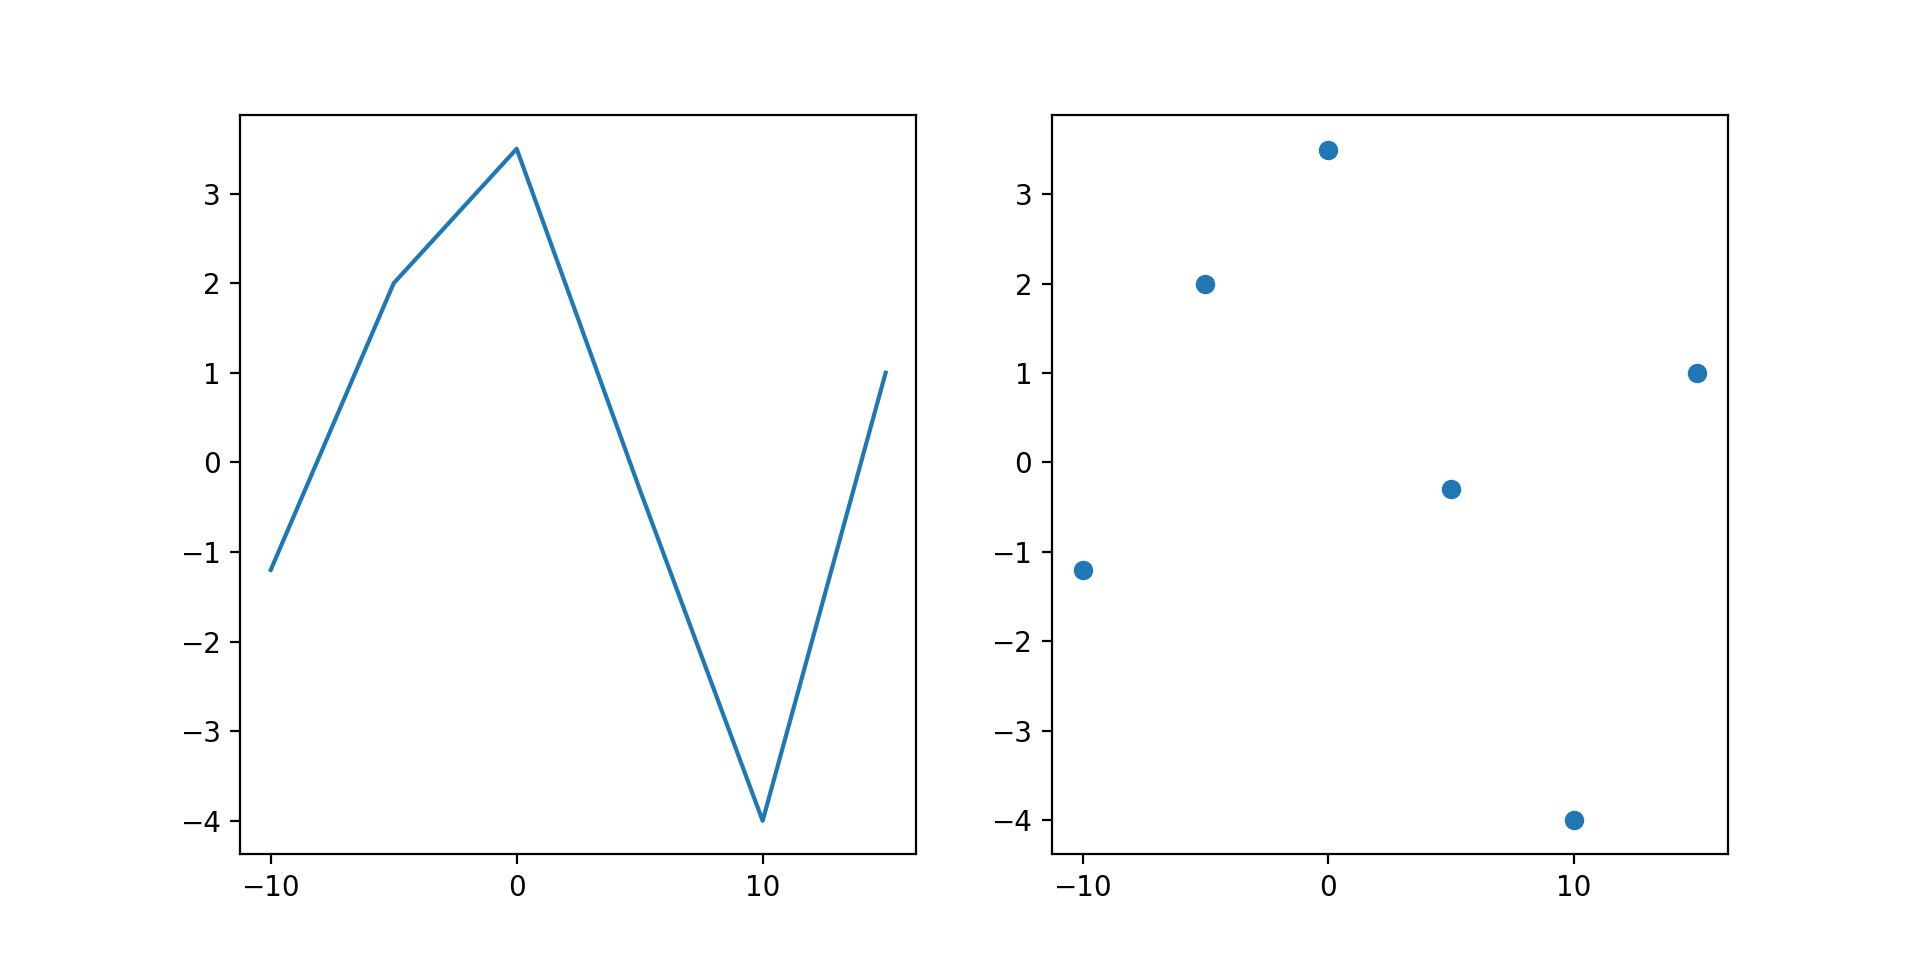

In [2]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(0.5))

ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

plt.show()

### `ax.margins(...)`

If you'd like to add a bit of "padding" to a plot, `ax.margins(<some_small_fraction>)` is a very handy way to do so.  Instead of choosing "even-ish" numbers as min/max ranges for each axis, `margins` will make Matplotlib calculate the min/max of each axis by taking the range of the data and adding on a fractional amount of padding.

As an example:

<IPython.core.display.Javascript object>


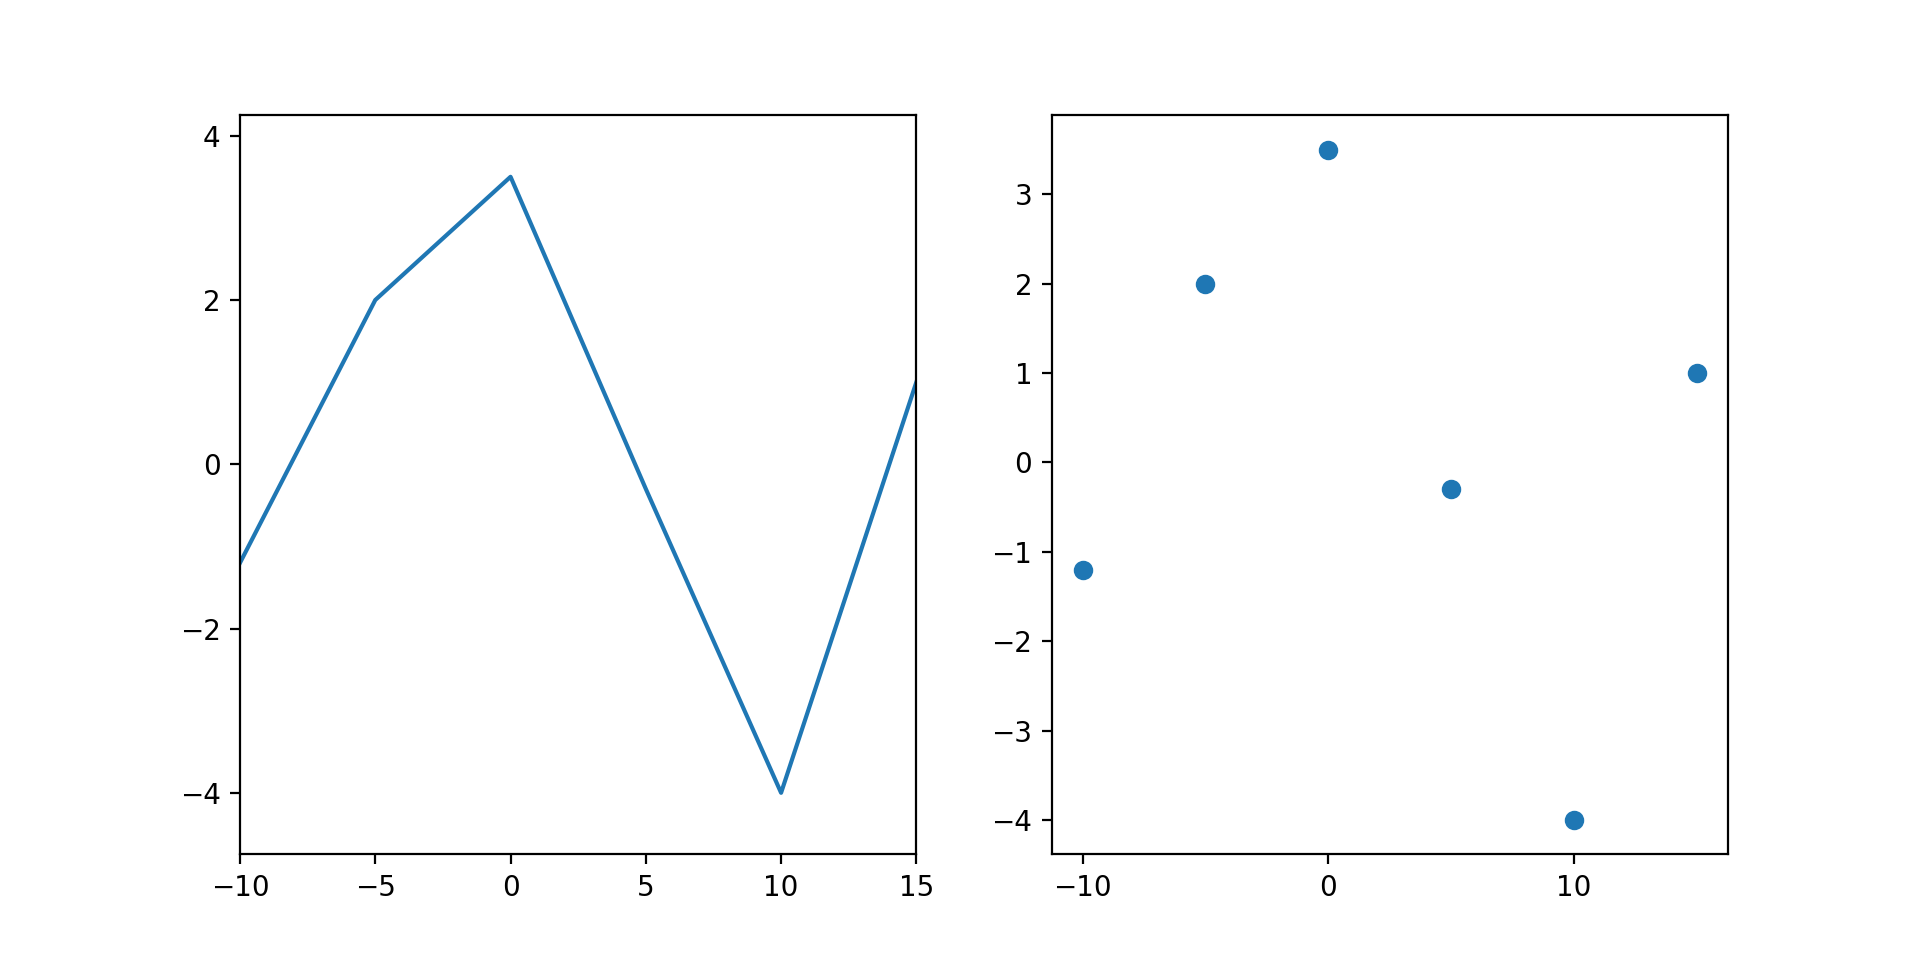

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))

ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

ax1.margins(x=0.0, y=0.1) # 10% padding in the y-direction only
ax2.margins(0.05) # 5% padding in all directions

plt.show()

### `ax.axis(...)`

The `ax.axis(...)` method is a convienent way of controlling the axes limits and enabling/disabling autoscaling.

If you ever need to get all of the current plot limits, calling `ax.axis()` with no arguments will return the xmin/max/etc:

    xmin, xmax, ymin, ymax = ax.axis()
    
If you'd like to manually set all of the x/y limits at once, you can use `ax.axis` for this, as well (note that we're calling it with a single argument that's a sequence, not 4 individual arguments):

    ax.axis([xmin, xmax, ymin, ymax])
    
However, you'll probably use `axis` mostly with either the `"tight"` or `"equal"` options. There are other options as well; see the documentation for full details.  In a nutshell, though:

  * *tight*: Set axes limits to the exact range of the data
  * *equal*: Set axes scales such that one cm/inch in the y-direction is the same as one cm/inch in the x-direction. In Matplotlib terms, this sets the aspect ratio of the plot to 1.  That _doesn't_ mean that the axes "box" will be square.
  
And as an example:

<IPython.core.display.Javascript object>


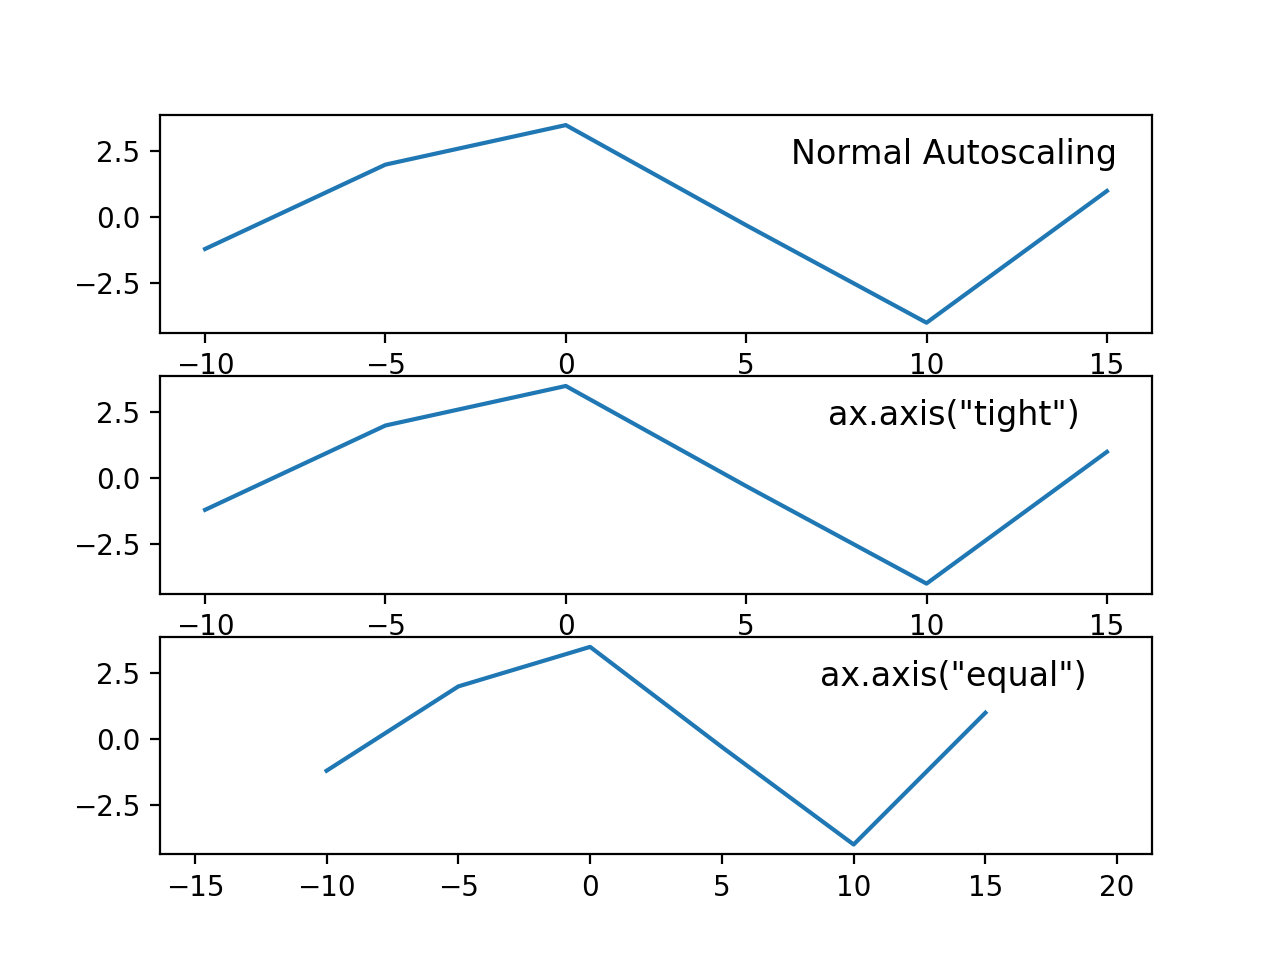

In [4]:
fig, axes = plt.subplots(nrows=3)

for ax in axes:
    ax.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

axes[0].set_title('Normal Autoscaling', y=0.7, x=0.8)

axes[1].set_title('ax.axis("tight")', y=0.7, x=0.8)
axes[1].axis('tight')

axes[2].set_title('ax.axis("equal")', y=0.7, x=0.8)
axes[2].axis('equal')

plt.show()

### Manually setting only one limit

Another trick with limits is to specify only half of a limit. When done **after** a plot is made, this has the effect of allowing the user to anchor a limit while letting Matplotlib autoscale the rest of it.

<IPython.core.display.Javascript object>


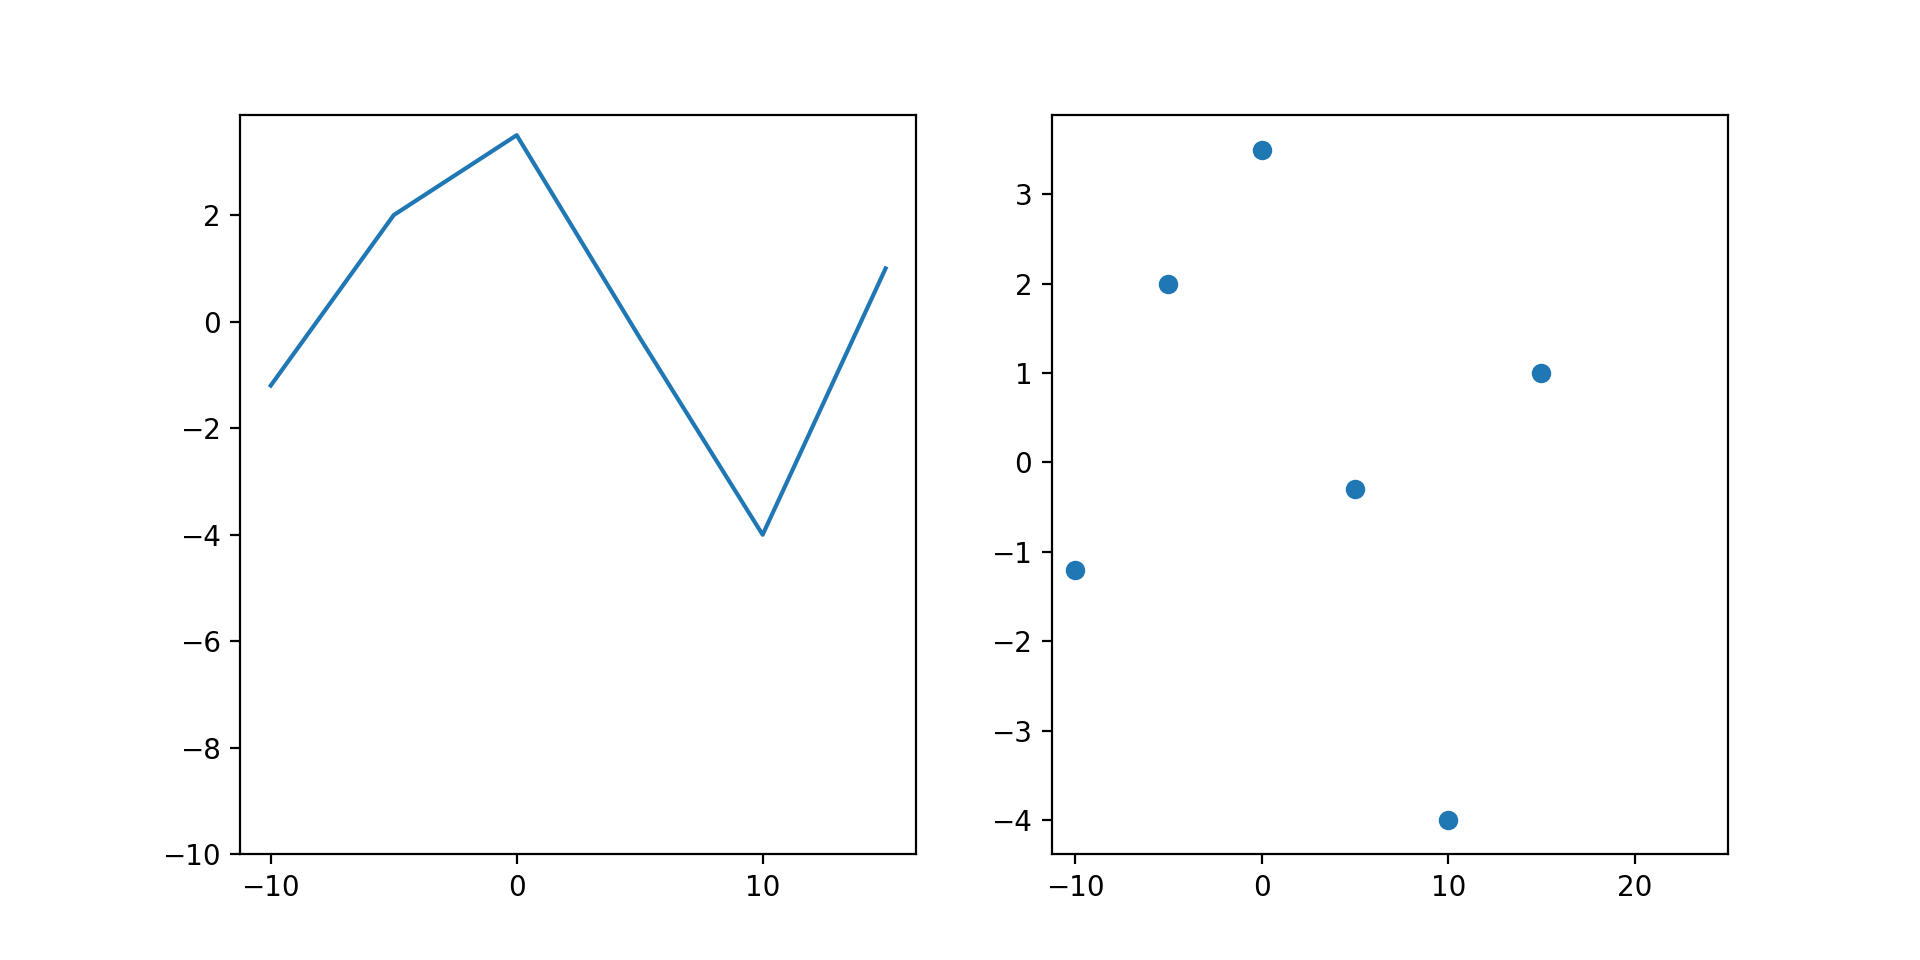

In [5]:
# Good -- setting limits after plotting is done
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax1.set_ylim(bottom=-10)
ax2.set_xlim(right=25)
plt.show()

In [ ]:
# Bad -- Setting limits before plotting is done
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax1.set_ylim(bottom=-10)
ax2.set_xlim(right=25)
ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
plt.show()

# Legends

As you've seen in some of the examples so far, the X and Y axis can also be labeled, as well as the subplot itself via the title. 

However, another thing you can label is the line/point/bar/etc that you plot.  You can provide a label to your plot, which allows your legend to automatically build itself. 

<IPython.core.display.Javascript object>


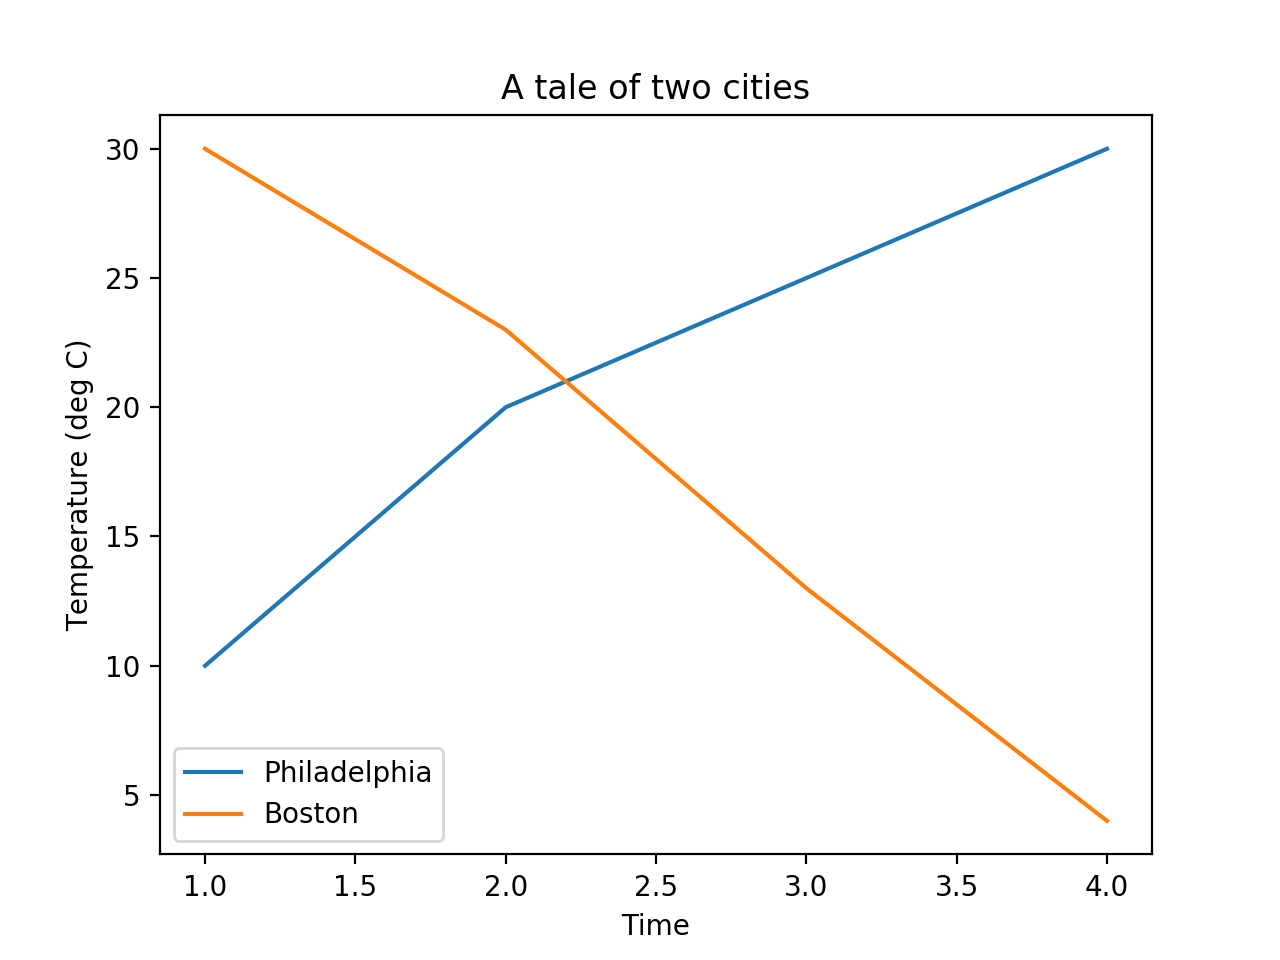

In [6]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Philadelphia')
ax.plot([1, 2, 3, 4], [30, 23, 13, 4], label='Boston')
ax.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
ax.legend()
plt.show()

In `classic` mode, legends will go in the upper right corner by default (you can control this with the `loc` kwarg). As of v2.0, by default Matplotlib will choose a location to avoid overlapping plot elements as much as possible. To force this option, you can pass in:

    ax.legend(loc="best")
    
Also, if you happen to be plotting something that you do not want to appear in the legend, just set the label to "\_nolegend\_".

<IPython.core.display.Javascript object>


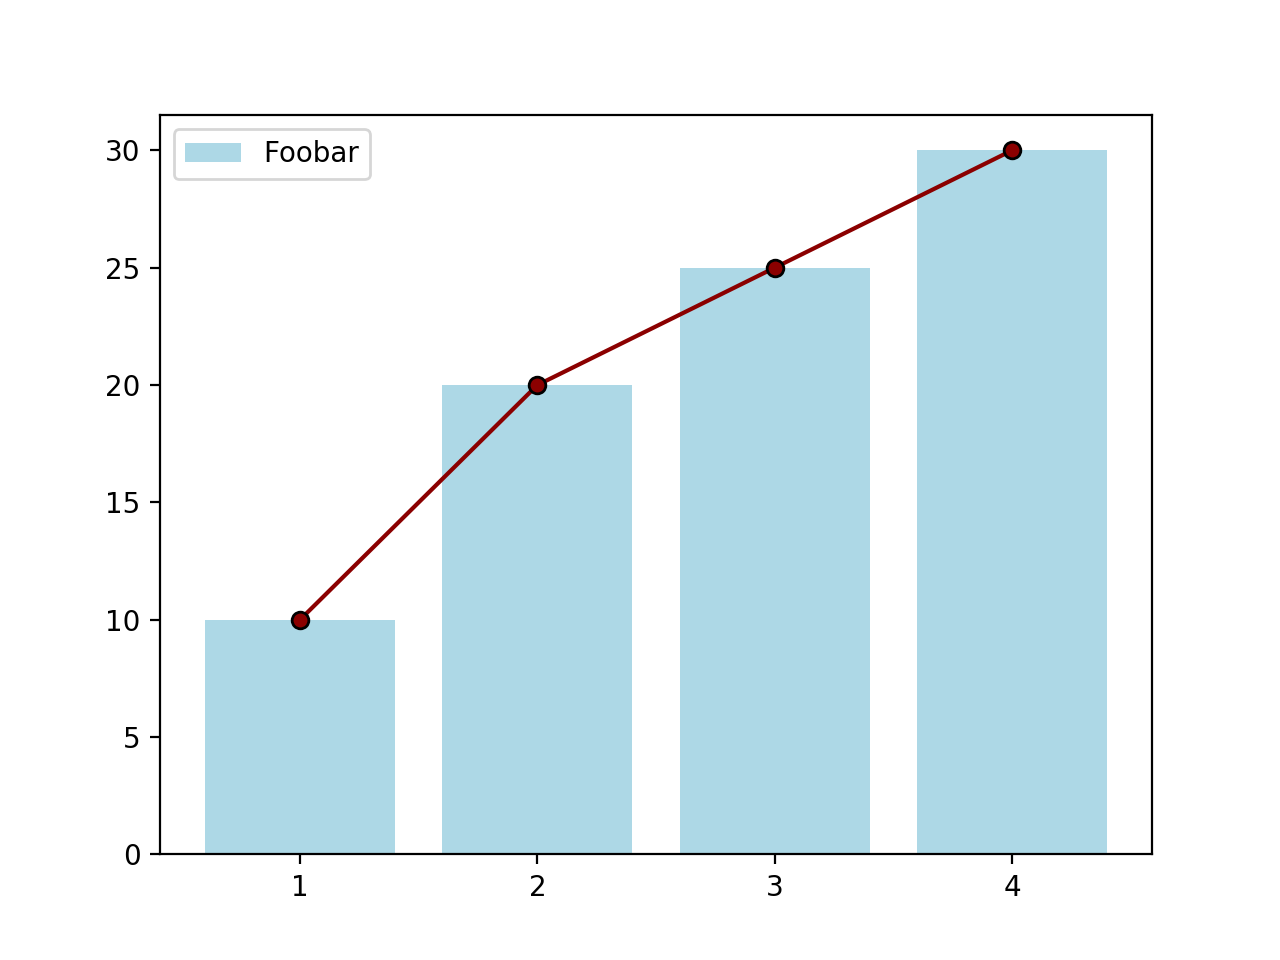

In [7]:
fig, ax = plt.subplots(1, 1)
ax.bar([1, 2, 3, 4], [10, 20, 25, 30], label="Foobar", align='center', color='lightblue')
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label="_nolegend_", marker='o', color='darkred')
ax.legend(loc='best')
plt.show()

# Exercise 4.1

Once again, let's use a bit of what we've learned.  Try to reproduce the following figure:

<img src="images/exercise_4-1.png">

Hint: You'll need to combine `ax.axis(...)` and `ax.margins(...)`.  Here's the data and some code to get you started:

In [ ]:
# %load exercises/4.1-legends_and_scaling.py
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('classic')

# Try to reproduce the figure shown in images/exercise_4-1.png
# Here's the data and colors used.

t = np.linspace(0, 2 * np.pi, 150)
x1, y1 = np.cos(t), np.sin(t)
x2, y2 = 2 * x1, 2 * y1

colors = ['darkred', 'darkgreen']

# Try to plot the two circles, scale the axes as shown and add a legend
# Hint: it's easiest to combine `ax.axis(...)` and `ax.margins(...)` to scale
# the axes


In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('classic')

t = np.linspace(0, 2 * np.pi, 150)
x1, y1 = np.cos(t), np.sin(t)
x2, y2 = 2 * x1, 2 * y1

colors = ['darkred', 'darkgreen']

# Try to plot the two circles, scale the axes as shown and add a legend
# Hint: it's easiest to combine `ax.axis(...)` and `ax.margins(...)` to scale the axes

# Dealing with the boundaries: Layout, ticks, spines, etc

One key thing we haven't talked about yet is all of the annotation on the outside of the axes, the borders of the axes, and how to adjust the amount of space around the axes.  We won't go over every detail, but this next section should give you a reasonable working knowledge of how to configure what happens around the edges of your axes.

## Ticks, Tick Lines, Tick Labels and Tickers
This is a constant source of confusion:

* A Tick is the *location* of a Tick Label.
* A Tick Line is the line that denotes the location of the tick.
* A Tick Label is the text that is displayed at that tick.
* A [`Ticker`](http://matplotlib.org/api/ticker_api.html#module-matplotlib.ticker) automatically determines the ticks for an Axis and formats the tick labels.

[`tick_params()`](https://matplotlib.org/api/axes_api.html#ticks-and-tick-labels) is often used to help configure your tickers.

<IPython.core.display.Javascript object>


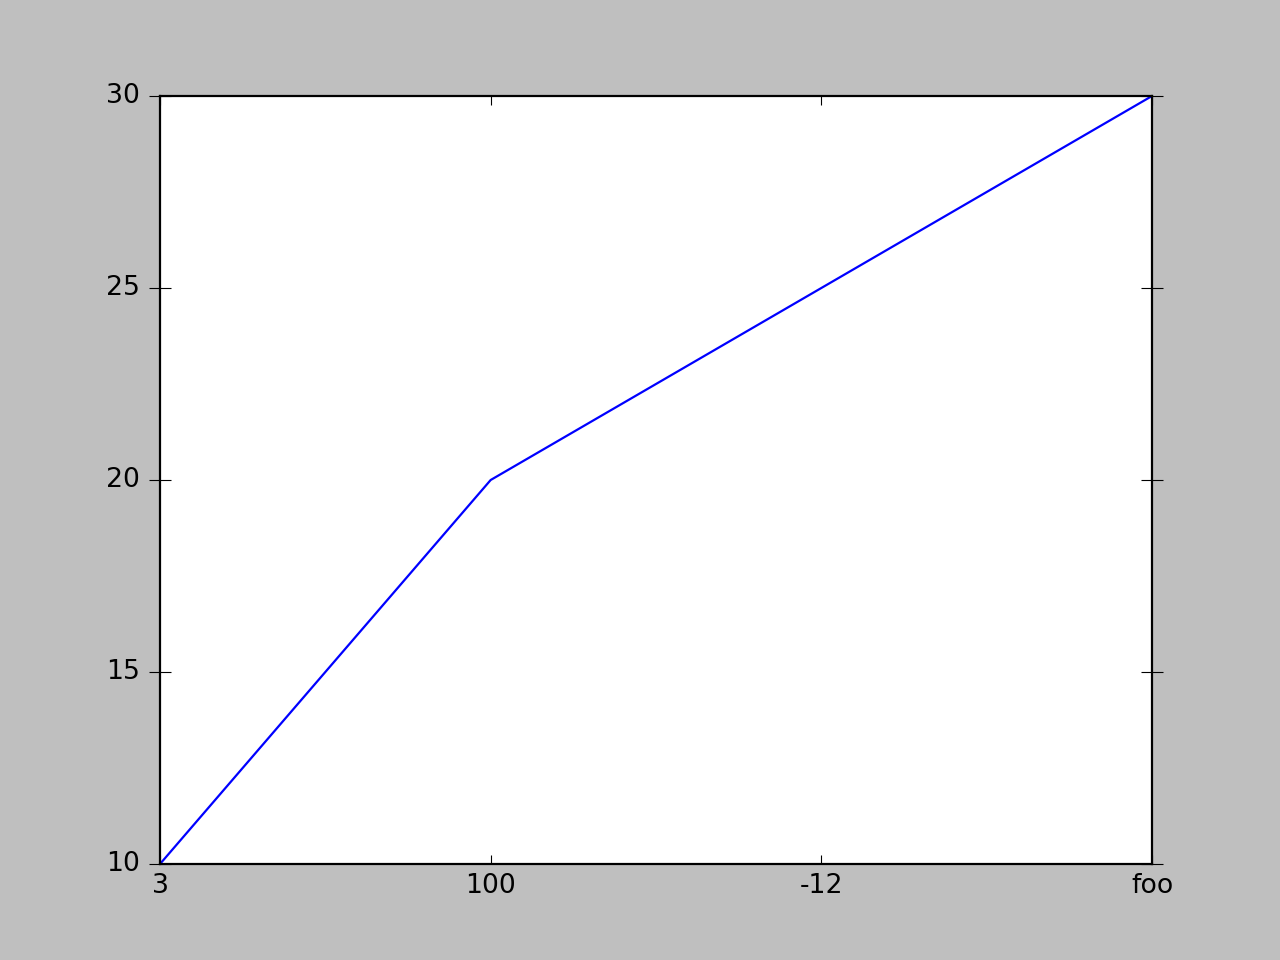

In [10]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])

# Manually set ticks and tick labels *on the x-axis* (note ax.xaxis.set, not ax.set!)
ax.xaxis.set(ticks=range(1, 5), ticklabels=[3, 100, -12, "foo"]) 

# Make the y-ticks a bit longer and go both in and out...
ax.tick_params(axis='y', direction='inout', length=10)

plt.show()

A commonly-asked question is "How do I plot categories?"

Starting in version 2.0 of mpl, just like any other data.

For example:

<IPython.core.display.Javascript object>


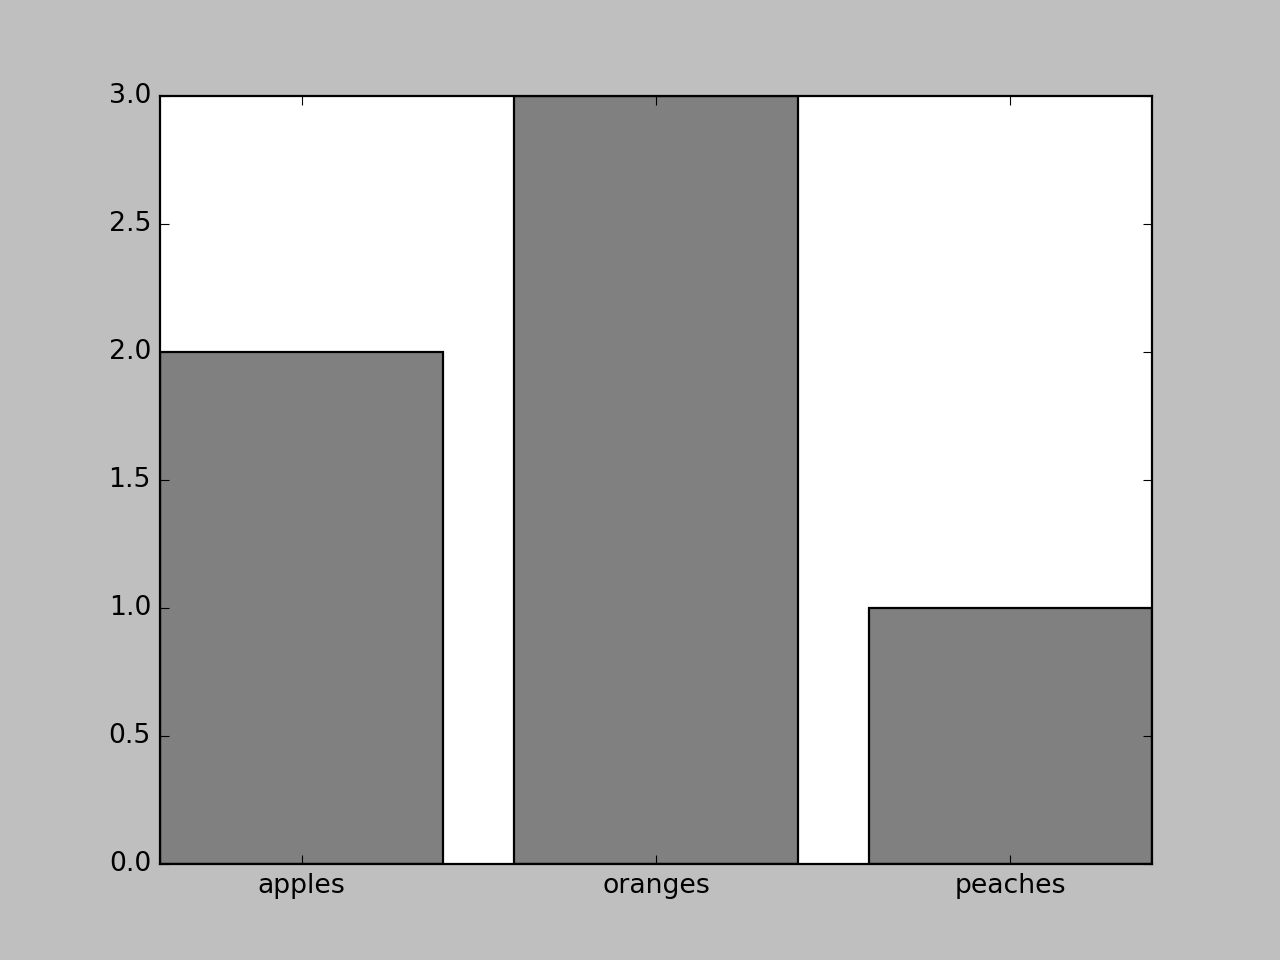

In [11]:
data = [('apples', 2), ('oranges', 3), ('peaches', 1)]
fruit, value = zip(*data)

fig, ax = plt.subplots()
ax.bar(fruit, value, align='center', color='gray')
plt.show()

## Subplot Spacing
The spacing between the subplots can be adjusted using [`fig.subplots_adjust()`](http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.subplots_adjust). Play around with the example below to see how the different arguments affect the spacing.

<IPython.core.display.Javascript object>


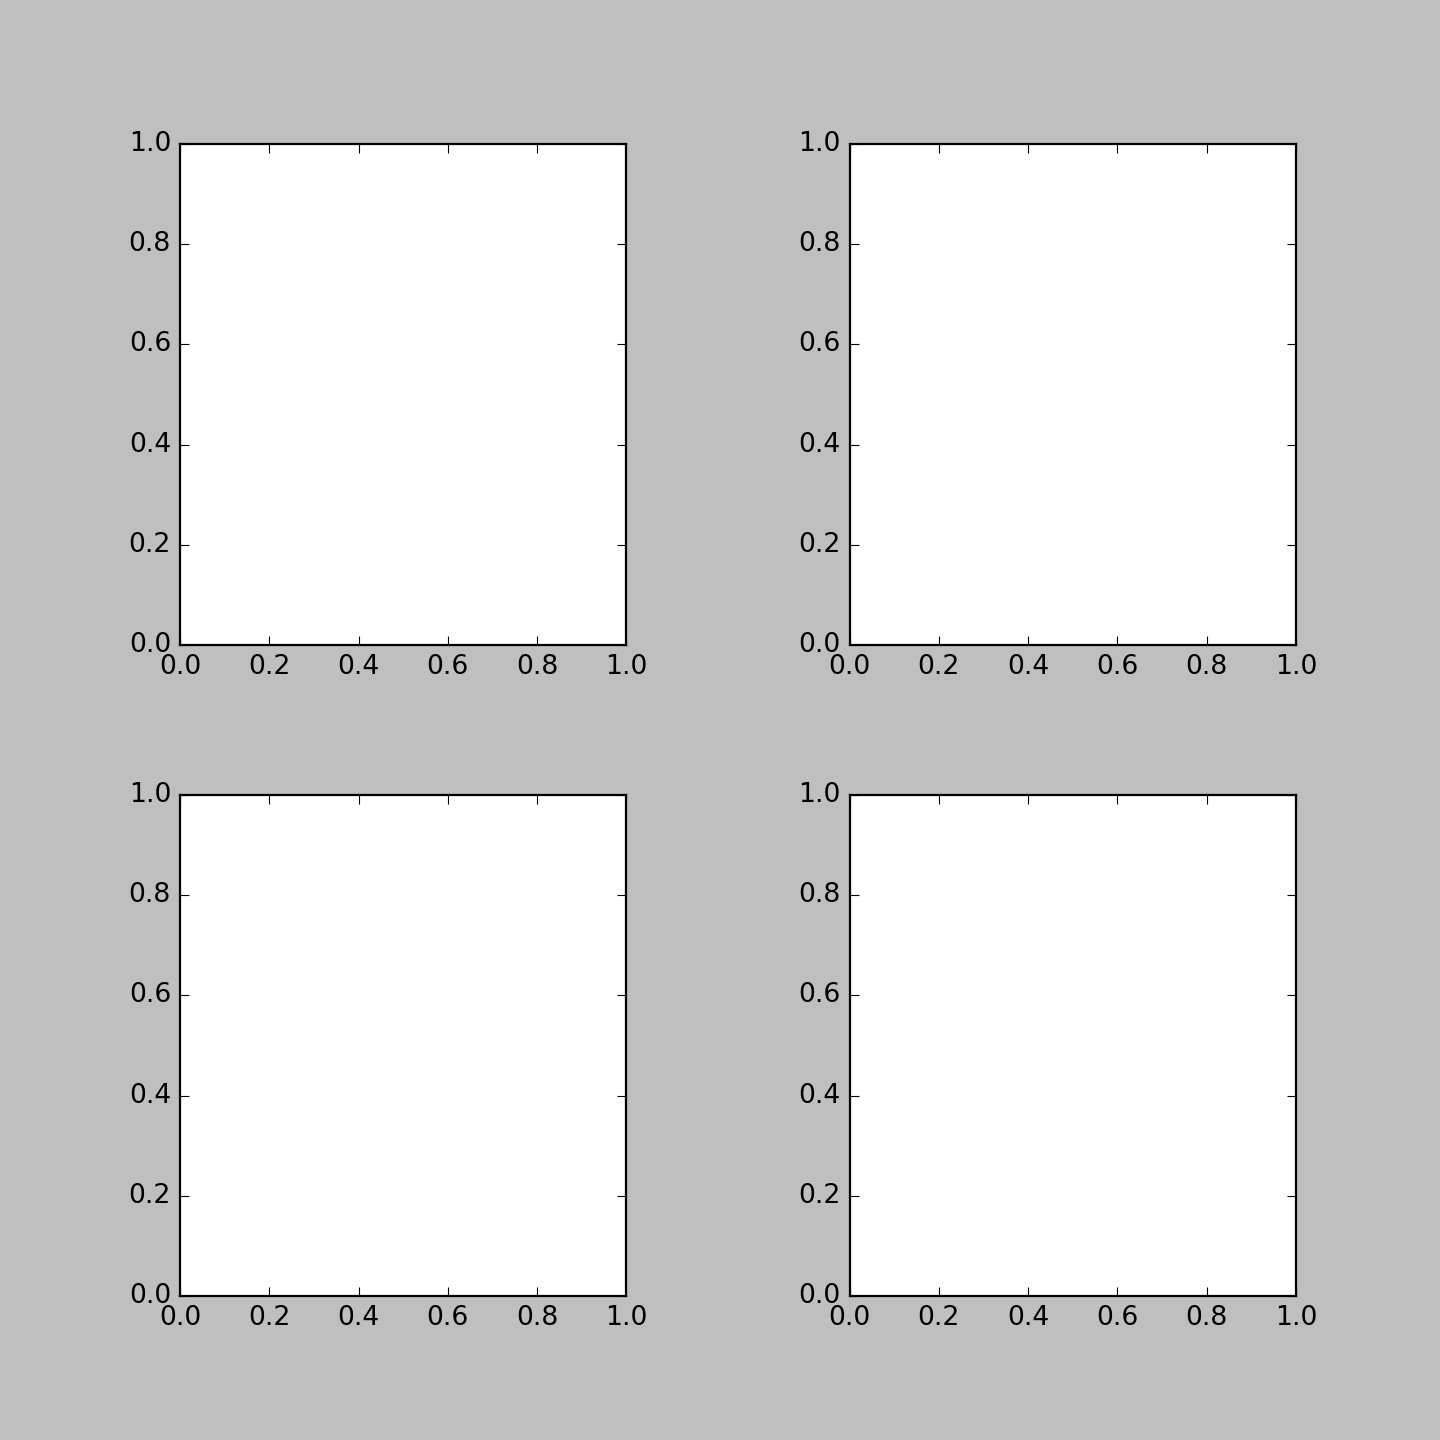

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))
fig.subplots_adjust(wspace=0.5, hspace=0.3,
                    left=0.125, right=0.9,
                    top=0.9,    bottom=0.1)
plt.show()

A common "gotcha" is that the labels are not automatically adjusted to avoid overlapping those of another subplot. Matplotlib does not currently have any sort of robust layout engine, as it is a design decision to minimize the amount of "magical plotting". We intend to let users have complete, 100% control over their plots. LaTeX users would be quite familiar with the amount of frustration that can occur with automatic placement of figures in their documents.

That said, there have been some efforts to develop tools that users can use to help address the most common compaints. The "[Tight Layout](http://matplotlib.org/users/tight_layout_guide.html)" feature, when invoked, will attempt to resize margins and subplots so that nothing overlaps.

If you have multiple subplots, and want to avoid overlapping titles/axis labels/etc, `fig.tight_layout` is a great way to do so:

<IPython.core.display.Javascript object>


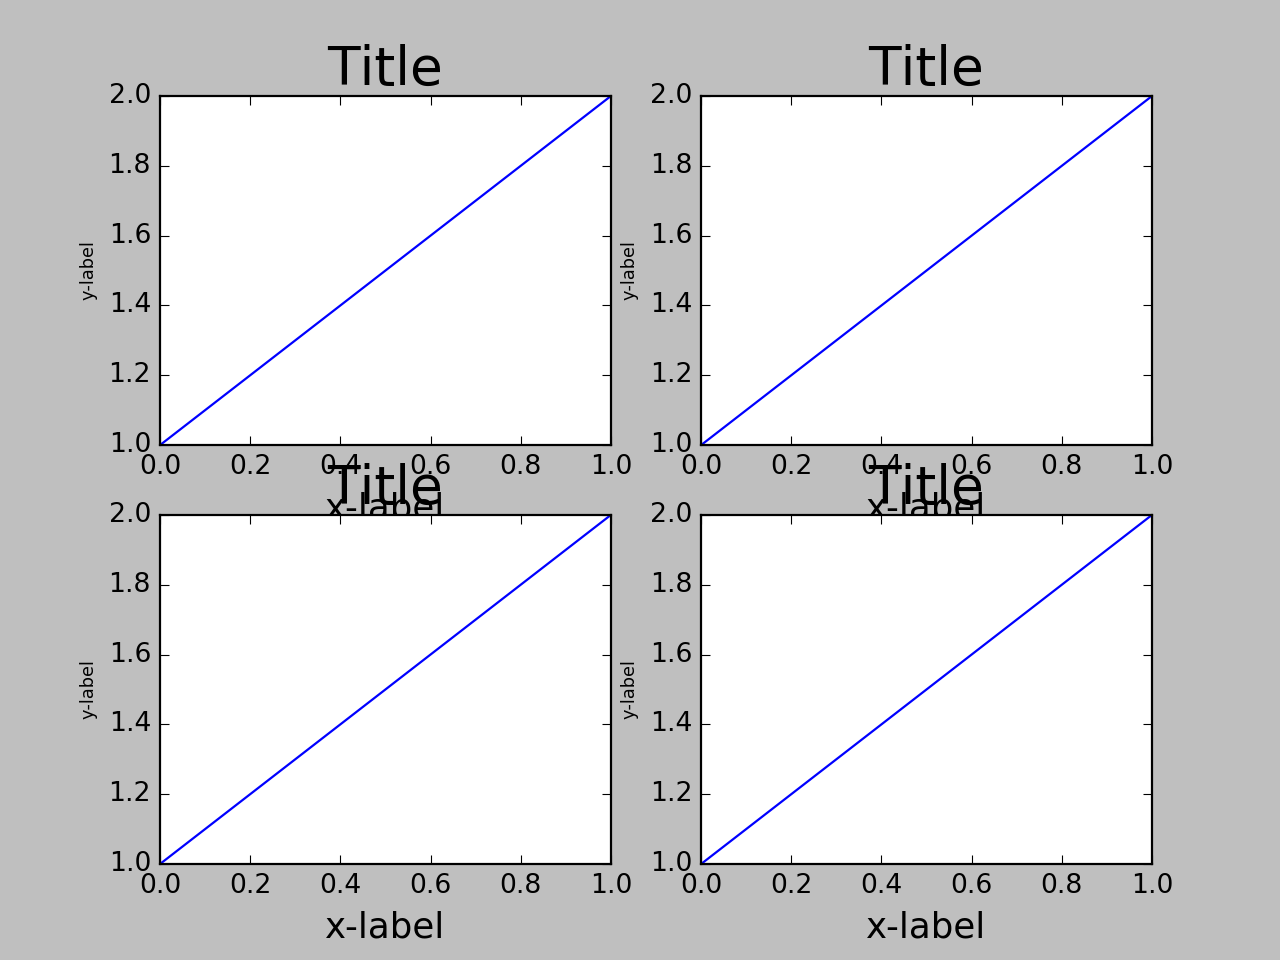

In [13]:
def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=16)
    ax.set_ylabel('y-label', fontsize=8)
    ax.set_title('Title', fontsize=24)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

# Enable fig.tight_layout to compare...
#fig.tight_layout()

plt.show()

## GridSpec
Under the hood, Matplotlib utilizes [`GridSpec`](http://matplotlib.org/api/gridspec_api.html) to lay out the subplots. While `plt.subplots()` is fine for simple cases, sometimes you will need more advanced subplot layouts. In such cases, you should use GridSpec directly. GridSpec is outside the scope of this tutorial, but it is handy to know that it exists. [Here](http://matplotlib.org/users/gridspec.html) is a guide on how to use it.

## Sharing axes
There will be times when you want to have the x axis and/or the y axis of your subplots to be "shared". Sharing an axis means that the axis in one or more subplots will be tied together such that any change in one of the axis changes all of the other shared axes. This works very nicely with autoscaling arbitrary datasets that may have overlapping domains. Furthermore, when interacting with the plots (panning and zooming), all of the shared axes will pan and zoom automatically.

<IPython.core.display.Javascript object>


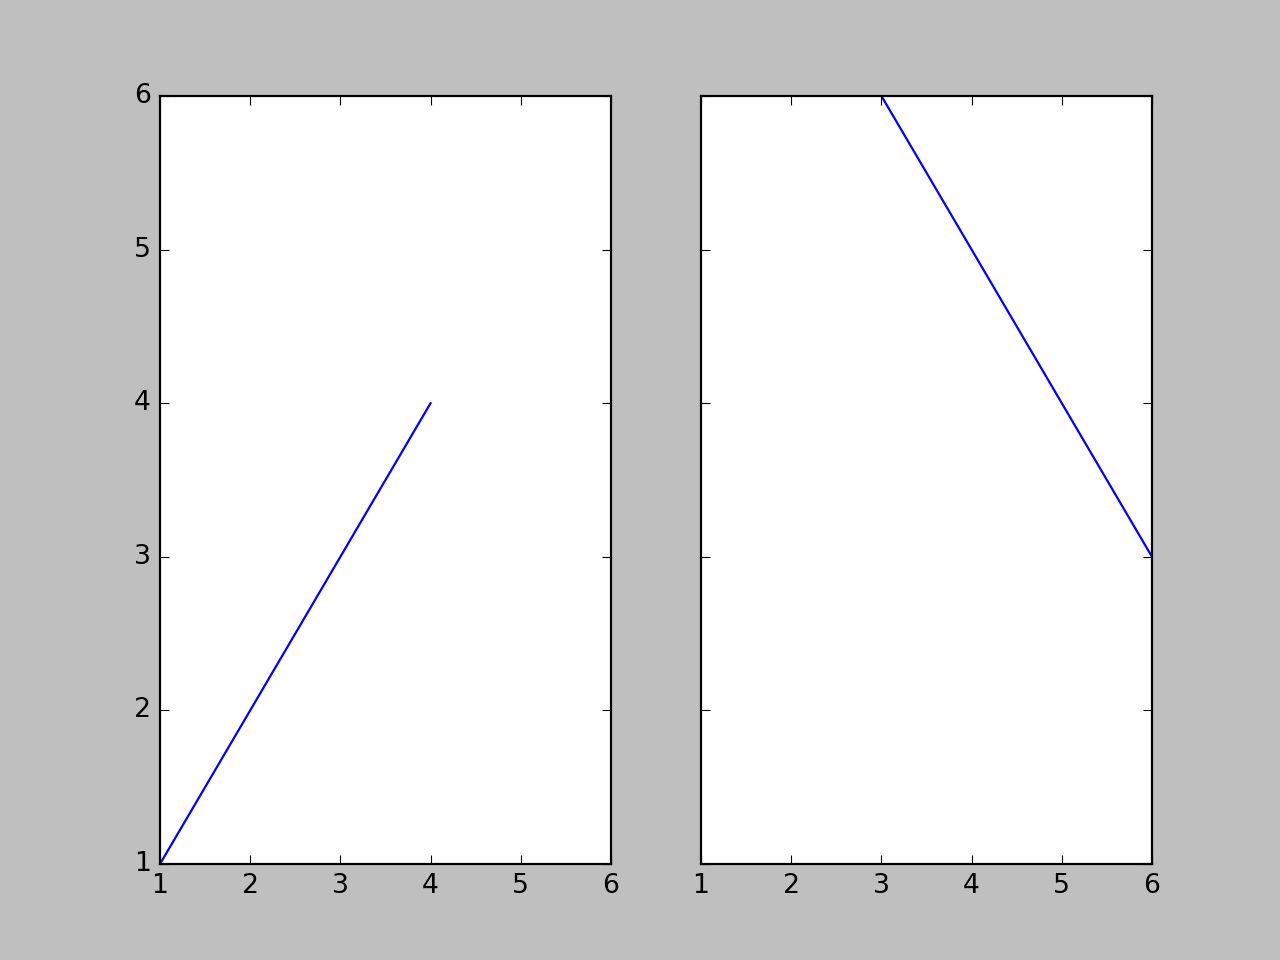

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.plot([1, 2, 3, 4], [1, 2, 3, 4])
ax2.plot([3, 4, 5, 6], [6, 5, 4, 3])
plt.show()

## "Twinning" axes
Sometimes one may want to overlay two plots on the same axes, but the scales may be entirely different. You can simply treat them as separate plots, but then twin them.

<IPython.core.display.Javascript object>


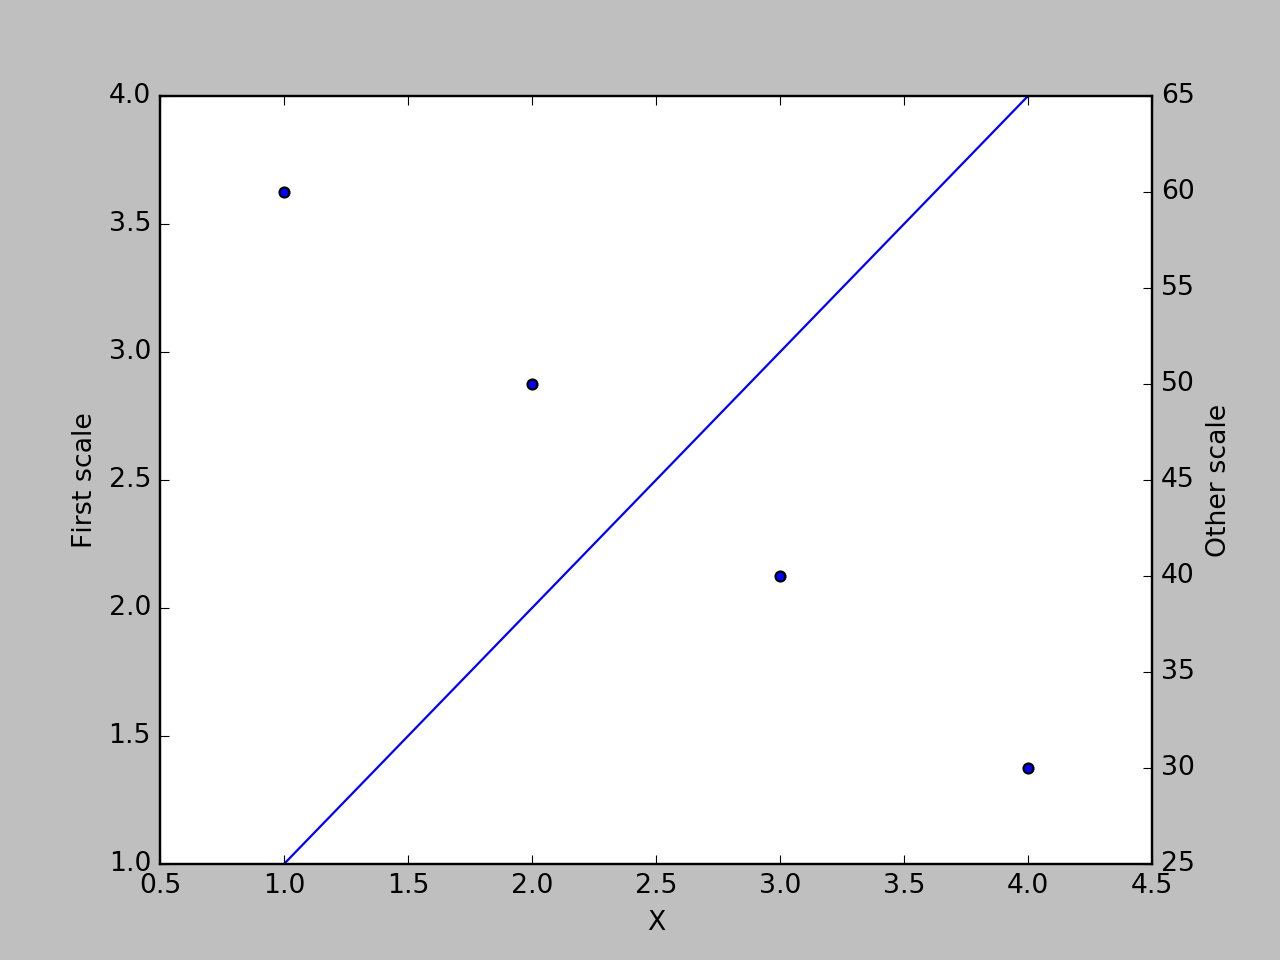

In [15]:
fig, ax1 = plt.subplots(1, 1)
ax1.plot([1, 2, 3, 4], [1, 2, 3, 4])
ax2 = ax1.twinx()
ax2.scatter([1, 2, 3, 4], [60, 50, 40, 30])
ax1.set(xlabel='X', ylabel='First scale')
ax2.set(ylabel='Other scale')
plt.show()

# Axis Spines
Spines are the axis lines for a plot. Each plot can have four spines: "top", "bottom", "left" and "right". By default, they are set so that they frame the plot, but they can be individually positioned and configured via the [`set_position()`](http://matplotlib.org/api/spines_api.html#matplotlib.spines.Spine.set_position) method of the spine. Here are some different configurations.

<IPython.core.display.Javascript object>


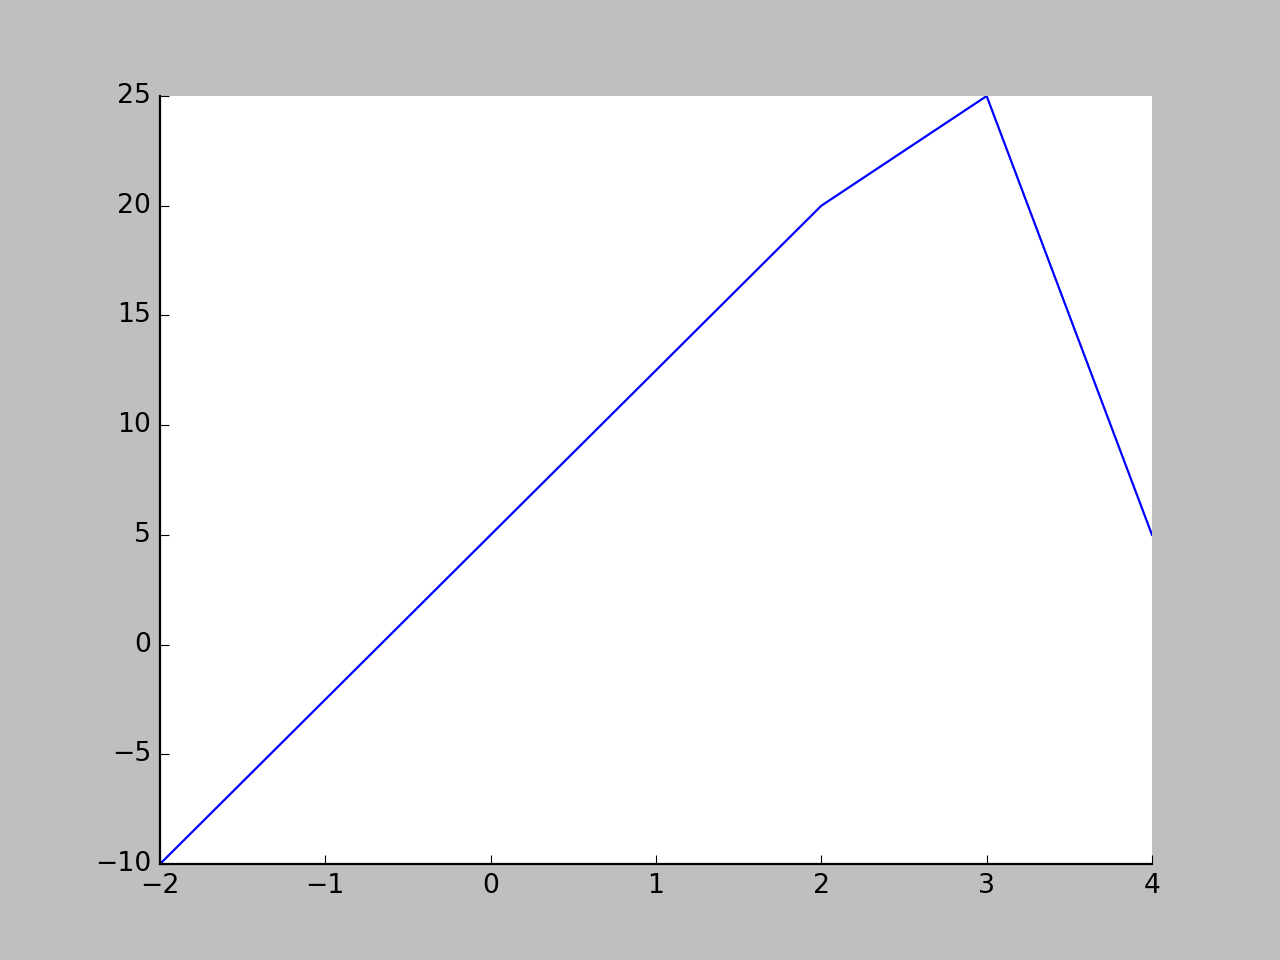

In [16]:
fig, ax = plt.subplots()
ax.plot([-2, 2, 3, 4], [-10, 20, 25, 5])
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')  # no ticklines at the top
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')  # no ticklines on the right

# "outward"
# Move the two remaining spines "out" away from the plot by 10 points
#ax.spines['bottom'].set_position(('outward', 10))
#ax.spines['left'].set_position(('outward', 10))

# "data"
# Have the spines stay intersected at (0,0)
#ax.spines['bottom'].set_position(('data', 0))
#ax.spines['left'].set_position(('data', 0))

# "axes"
# Have the two remaining spines placed at a fraction of the axes
#ax.spines['bottom'].set_position(('axes', 0.75))
#ax.spines['left'].set_position(('axes', 0.3))

plt.show()

# Exercise 4.2

This one is a bit trickier.  Once again, try to reproduce the figure below:

<img src="images/exercise_4-2.png">


A few key hints: The two subplots have no vertical space between them (this means that the `hspace` is `0`). Note that the bottom spine is at 0 in data coordinates and the tick lines are missing from the right and top sides.

Because you're going to be doing a lot of the same things to both subplots, to avoid repitive code you might consider writing a function that takes an `Axes` object and makes the spine changes, etc to it. 



In [ ]:
# %load exercises/4.2-spines_ticks_and_subplot_spacing.py
import matplotlib.pyplot as plt
import numpy as np

# Try to reproduce the figure shown in images/exercise_4.2.png
# This one is a bit trickier!

# Here's the data...
data = [('dogs', 4, 4), ('frogs', -3, 1), ('cats', 1, 5), ('goldfish', -2, 2)]
animals, friendliness, popularity = zip(*data)


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Try to reproduce the figure shown in images/exercise_4.2.png
# This one is a bit trickier!

# Here's the data...
data = [('dogs', 4, 4), ('frogs', -3, 1), ('cats', 1, 5), ('goldfish', -2, 2)]
animals, friendliness, popularity = zip(*data)